## 이론적인 Cliquet Option

예제클리켓 옵션(Cliquet Option)은 주기적으로 리셋되는 옵션으로, 각 리셋 기간 동안의 수익률이 페이오프에 포함됩니다. 이러한 옵션은 여러 리셋 기간 동안 누적 수익률을 보장하거나 제한할 수 있습니다. 클리켓 옵션의 주요 특징은 리셋 주기마다 기초 자산의 가격이 초기화되고, 그 기간 동안의 성과가 총 페이오프에 추가되는 것입니다.

Cliquet Option Price: 0.03


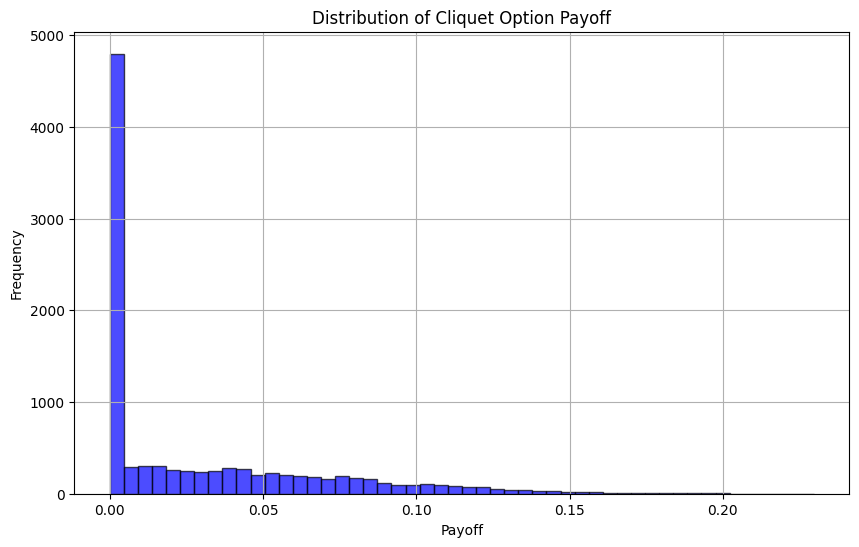

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 월)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x (M + 1))
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def cliquet_option_payoff(paths, cap, floor):
    """
    클리켓 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x (M + 1))
    cap: 각 리셋 기간 동안의 최대 수익률
    floor: 각 리셋 기간 동안의 최소 수익률

    Returns:
    클리켓 옵션의 페이오프 배열
    """
    M = paths.shape[1] - 1
    returns = np.diff(paths, axis=1) / paths[:, :-1]
    capped_returns = np.clip(returns, floor, cap)
    total_returns = np.sum(capped_returns, axis=1)
    payoff = np.maximum(total_returns, 0)
    return payoff

# 예제 파라미터
S0 = 100  # 초기 주식 가격
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
T = 1  # 만기 시간 (1년)
M = 12  # 리셋 기간 수 (월 단위)
I = 10000  # 시뮬레이션 수
cap = 0.02  # 각 리셋 기간 동안의 최대 수익률 (2%)
floor = -0.02  # 각 리셋 기간 동안의 최소 수익률 (-2%)

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 클리켓 옵션 페이오프 계산
cliquet_payoff = cliquet_option_payoff(paths, cap, floor)

# 클리켓 옵션 가격 계산 (할인된 페이오프 평균)
cliquet_price = np.exp(-r * T) * np.mean(cliquet_payoff)
print(f"Cliquet Option Price: {cliquet_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(cliquet_payoff, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Cliquet Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 실제 데이터 적용


[*********************100%%**********************]  1 of 1 completed


Cliquet Option Price: 0.10


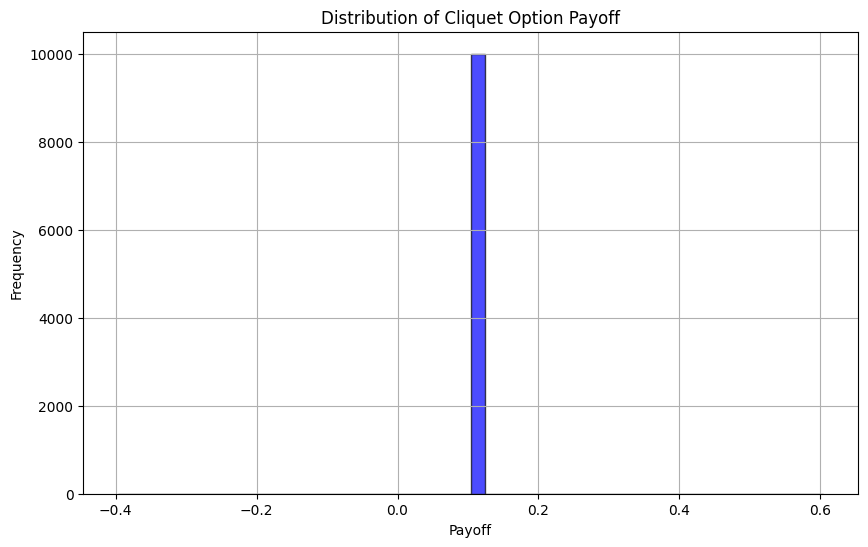

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def cliquet_option_payoff(prices, cap, floor):
    """
    클리켓 옵션의 페이오프 계산 함수

    Parameters:
    prices: 주식 가격 배열
    cap: 각 리셋 기간 동안의 최대 수익률
    floor: 각 리셋 기간 동안의 최소 수익률

    Returns:
    클리켓 옵션의 페이오프 배열
    """
    returns = np.diff(prices) / prices[:-1]
    capped_returns = np.clip(returns, floor, cap)
    total_returns = np.sum(capped_returns)
    payoff = np.maximum(total_returns, 0)
    return payoff

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
closing_prices = data['Close'].values

# 클리켓 옵션 파라미터 설정
r = 0.05  # 무위험 이자율
T = 1  # 만기 시간 (1년)
cap = 0.02  # 각 리셋 기간 동안의 최대 수익률 (2%)
floor = -0.02  # 각 리셋 기간 동안의 최소 수익률 (-2%)

# 월간 주식 가격 추출
monthly_prices = data['Close'].resample('M').last().values

# 클리켓 옵션 페이오프 계산
I = 10000  # 시뮬레이션 수
cliquet_payoffs = np.array([cliquet_option_payoff(monthly_prices, cap, floor) for _ in range(I)])

# 클리켓 옵션 가격 계산 (할인된 페이오프 평균)
cliquet_price = np.exp(-r * T) * np.mean(cliquet_payoffs)
print(f"Cliquet Option Price: {cliquet_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(cliquet_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Cliquet Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
